# 2-2维kmeans

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

<built-in method keys of dict object at 0x000002BB44E17AC0>
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011', '__version__': '1.0', '__globals__': [], 'X': array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241

C:\Users\xyt556\PycharmProjects\big_data\envi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


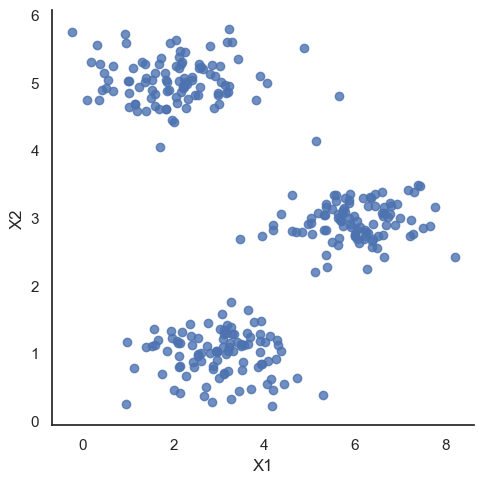

In [14]:
mat = sio.loadmat('./data/ex7data2.mat')
print(mat.keys)
print(mat)
print(mat.get('__header__'))
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)
plt.show()

# 0. random init
for initial centroids

In [3]:
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c


# k-means fn --------------------------------
def random_init(data, k):
    """choose k sample from data set as init centroids
    Args:
        data: DataFrame
        k: int
    Returns:
        k samples: ndarray
    """
    return data.sample(k).as_matrix()


def _find_your_cluster(x, centroids):
    """find the right cluster for x with respect to shortest distance
    Args:
        x: ndarray (n, ) -> n features
        centroids: ndarray (k, n)
    Returns:
        k: int
    """
    distances = np.apply_along_axis(func1d=np.linalg.norm,  # this give you l2 norm
                                    axis=1,
                                    arr=centroids - x)  # use ndarray's broadcast
    return np.argmin(distances)


def assign_cluster(data, centroids):
    """assign cluster for each node in data
    return C ndarray
    """
    return np.apply_along_axis(lambda x: _find_your_cluster(x, centroids),
                               axis=1,
                               arr=data.as_matrix())


def new_centroids(data, C):
    data_with_c = combine_data_C(data, C)

    return data_with_c.groupby('C', as_index=False).\
                       mean().\
                       sort_values(by='C').\
                       drop('C', axis=1).\
                       as_matrix()


def cost(data, centroids, C):
    m = data.shape[0]

    expand_C_with_centroids = centroids[C]

    distances = np.apply_along_axis(func1d=np.linalg.norm,
                                    axis=1,
                                    arr=data.as_matrix() - expand_C_with_centroids)
    return distances.sum() / m


def _k_means_iter(data, k, epoch=100, tol=0.0001):
    """one shot k-means
    with early break
    """
    centroids = random_init(data, k)
    cost_progress = []

    for i in range(epoch):
        print('running epoch {}'.format(i))

        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))

        if len(cost_progress) > 1:  # early break
            if (np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
                break

    return C, centroids, cost_progress[-1]


def k_means(data, k, epoch=100, n_init=10):
    """do multiple random init and pick the best one to return
    Args:
        data (pd.DataFrame)
    Returns:
        (C, centroids, least_cost)
    """

    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])

    least_cost_idx = np.argmin(tries[:, -1])

    return tries[least_cost_idx]


In [4]:
random_init(data2, 3)

array([[ 2.12857843,  5.01149793],
       [ 1.53178107,  1.10054852],
       [ 6.63262745,  3.14799183]])

# 1. cluster assignment
http://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

### find closest cluster experiment

In [5]:
init_centroids = random_init(data2, 3)
init_centroids

array([[ 5.72395697,  3.04454219],
       [ 4.06069132,  4.99503862],
       [ 2.61428678,  5.22287414]])

In [6]:
x = np.array([1, 1])

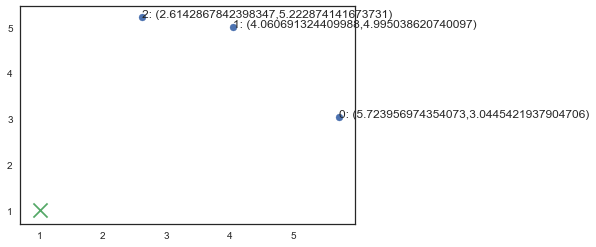

In [7]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:, 0], y=init_centroids[:, 1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({},{})'.format(i, node[0], node[1]), node)
    
ax.scatter(x[0], x[1], marker='x', s=200)
plt.show()

In [8]:
_find_your_cluster(x, init_centroids)

2

### 1 epoch cluster assigning

In [9]:
C = assign_cluster(data2, init_centroids)
data_with_c =combine_data_C(data2, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,2
1,5.658583,4.799964,1
2,6.352579,3.290854,0
3,2.904017,4.612204,2
4,3.231979,4.939894,2


See the first round clustering result

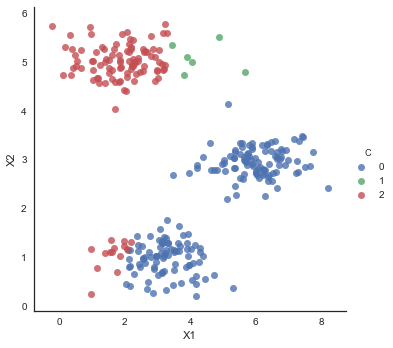

In [10]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# 2. calculate new centroid

In [11]:
new_centroids(data2, C)

array([[ 4.73487723,  2.0353857 ],
       [ 4.29404584,  5.07873879],
       [ 1.84130773,  4.50996357]])

# putting all together, take1
this is just 1 shot `k-means`, if the random init pick the bad starting centroids, the final clustering may be very sub-optimal

In [12]:
final_C, final_centroid, _= _k_means_iter(data2, 3)
data_with_c = combine_data_C(data2, final_C)

running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7


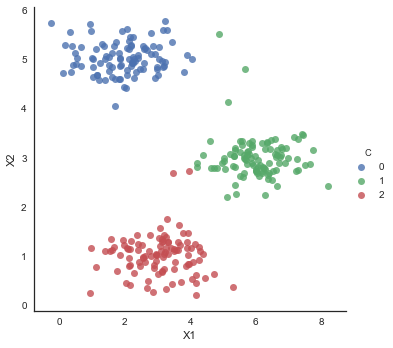

In [13]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# calculate the cost

In [14]:
cost(data2, final_centroid, final_C)

0.79417636337158704

# k-mean with multiple tries of randome init, pick the best one with least cost

In [15]:
best_C, best_centroids, least_cost = k_means(data2, 3)

running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 8
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6
running epoch 7
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5


In [16]:
least_cost

0.79417636337158704

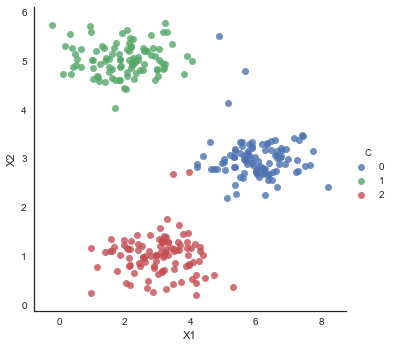

In [17]:
data_with_c = combine_data_C(data2, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

# try sklearn kmeans

In [18]:
from sklearn.cluster import KMeans

In [19]:
sk_kmeans = KMeans(n_clusters=3)

In [20]:
sk_kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
sk_C = sk_kmeans.predict(data2)

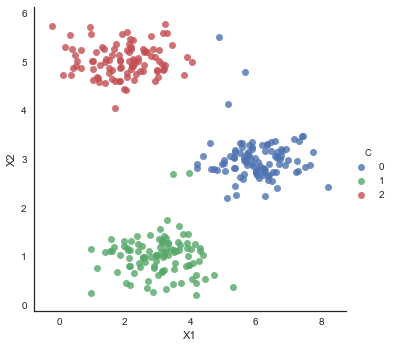

In [22]:
data_with_c = combine_data_C(data2, sk_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
plt.show()